<a href="https://colab.research.google.com/github/buraktanis/Cultural-Market/blob/main/Cultural_Market_Data_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:


df = pd.read_excel("/content/16run.xlsx", sheet_name="Purchase Matrix")

# df_with_05 = pd.read_excel("/content/7run.xlsx", sheet_name="Purchase Matrix(0,1)")
df_with_1 = pd.read_excel("/content/1run.xlsx", sheet_name="Purchase Matrix(0,1)")



Binary Matrix for t=5:
   Unnamed: 0  a1  a2  a3  a4  a5  a6  a7  a8  a9  ...  a91  a92  a93  a94  \
0           1   1   1   1   1   1   1   1   1   1  ...    1    1    1    1   
1           1   1   1   1   1   1   1   1   1   1  ...    1    1    1    1   
2           1   1   1   1   1   1   1   1   1   1  ...    1    1    1    1   
3           1   1   1   1   1   1   1   1   1   1  ...    1    1    1    1   
4           1   1   1   1   1   1   1   1   1   1  ...    1    1    1    1   

   a95  a96  a97  a98  a99  a100  
0    1    1    1    1    1     1  
1    1    1    1    1    1     1  
2    1    1    1    1    1     1  
3    1    1    1    1    1     1  
4    1    1    1    1    1     1  

[5 rows x 101 columns]

Binary Matrix for t=10:
   Unnamed: 0  a1  a2  a3  a4  a5  a6  a7  a8  a9  ...  a91  a92  a93  a94  \
0           1   1   1   1   1   1   1   1   1   1  ...    1    1    1    1   
1           1   1   1   1   1   1   1   1   1   1  ...    1    1    1    1   
2           1  

In [ ]:
df_with_1.index= df_with_1['Unnamed: 0']
df_with_1 = df_with_1.drop(columns=['Unnamed: 0'])
# df_with_0.index= df_with_0['Unnamed: 0']
# df_with_0 = df_with_0.drop(columns=['Unnamed: 0'])
# df_with_05.index= df_with_05['Unnamed: 0']
# df_with_05 = df_with_05.drop(columns=['Unnamed: 0'])
df_with_0

,b1,b2,b3,b4,b5,b6,b7,b8,b9,b10,...,b91,b92,b93,b94,b95,b96,b97,b98,b99,b100
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
a1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
a2,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
a3,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
a4,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
a5,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
a96,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
a97,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
a98,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


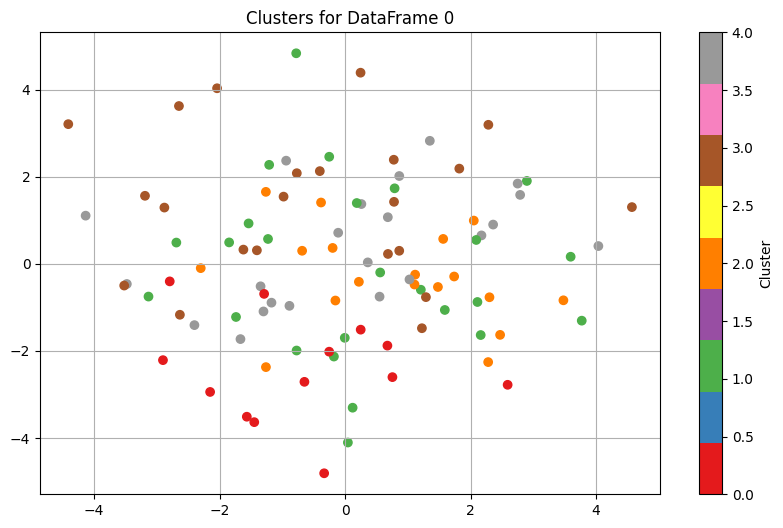

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


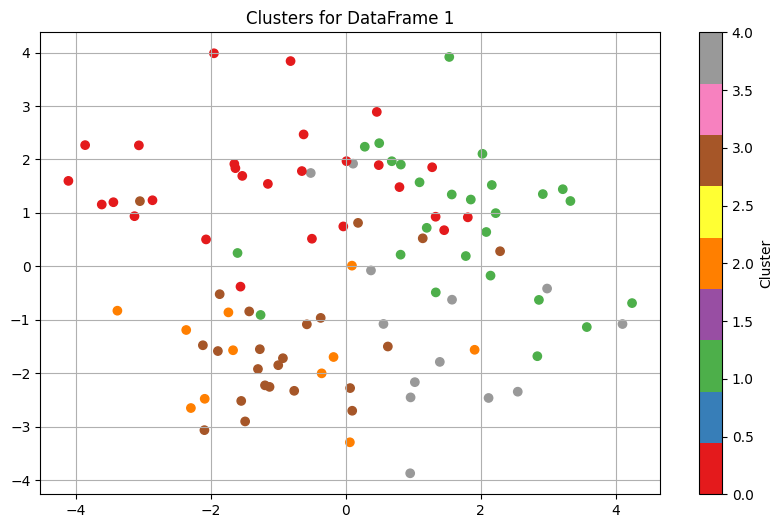

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


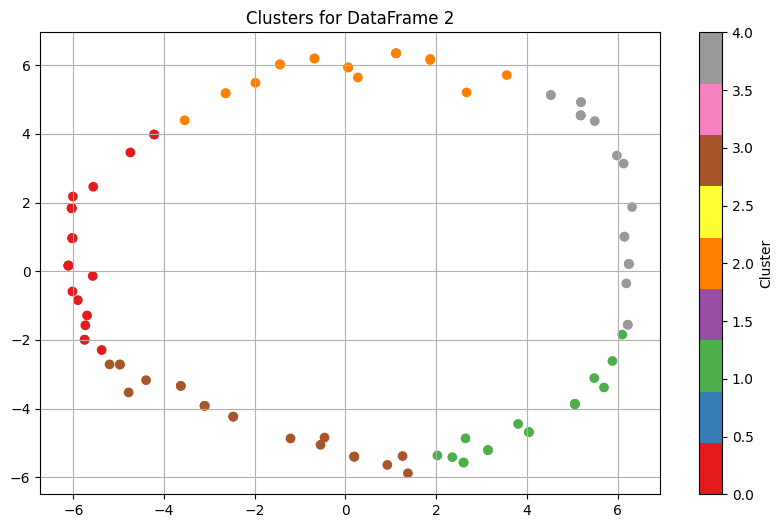

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import matplotlib.pyplot as plt
scaler = StandardScaler()

dfs = [df_with_1]
scaled_dfs = [scaler.fit_transform(df) for df in dfs]

# Her veri seti için KMeans ve PCA uygulama ve görselleştirme
for i, (df, scaled_df) in enumerate(zip(dfs, scaled_dfs)):
    # KMeans clustering
    kmeans = KMeans(n_clusters=5, random_state=42)
    kmeans.fit(scaled_df)
    cluster_labels = kmeans.labels_

    # PCA for dimensionality reduction
    pca = PCA(n_components=2)
    df_pca = pca.fit_transform(scaled_df)

    # Plotting the clusters
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(df_pca[:, 0], df_pca[:, 1], c=cluster_labels, cmap='Set1', marker='o', alpha=1)
    plt.title(f'Clusters for DataFrame {i}')
    plt.grid(True)
    plt.colorbar(scatter, label='Cluster')
    plt.show()

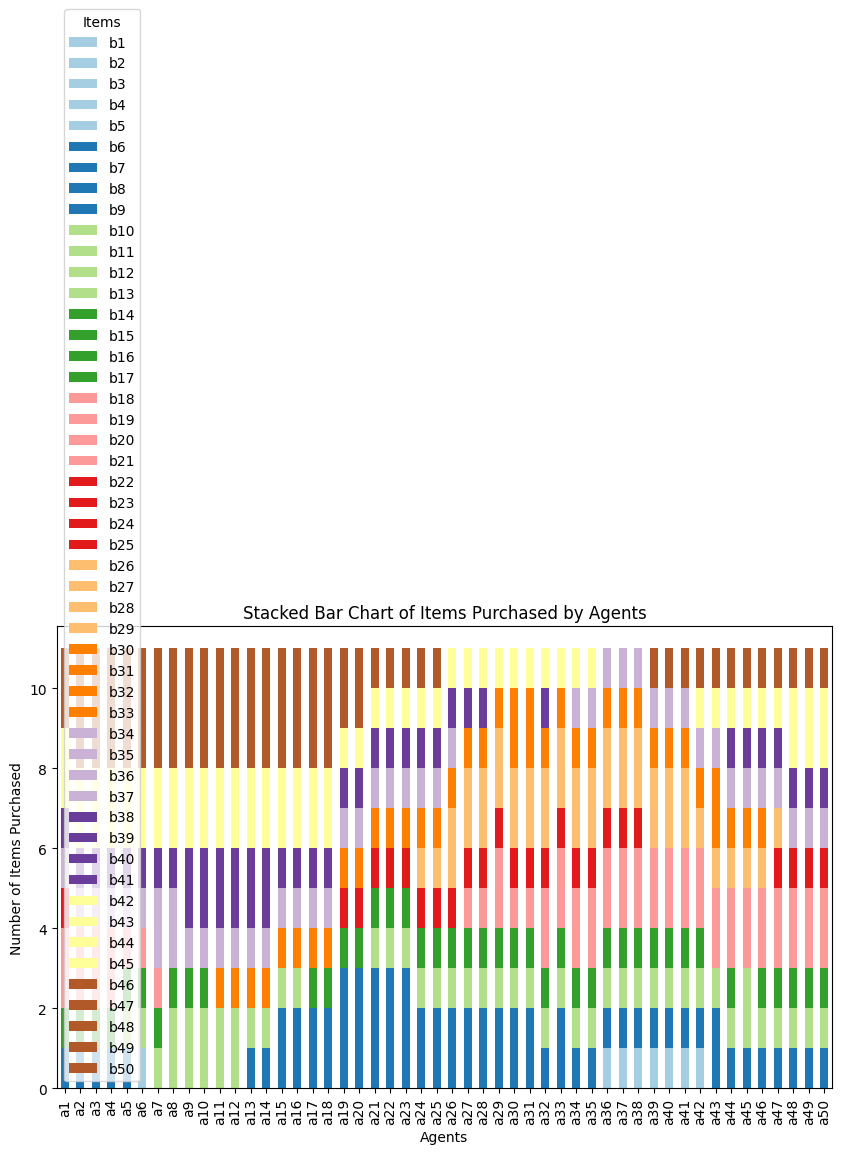

In [ ]:
df_with_1.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Paired')
plt.title("Stacked Bar Chart of Items Purchased by Agents")
plt.xlabel("Agents")
plt.ylabel("Number of Items Purchased")
plt.legend(title="Items")
plt.show()


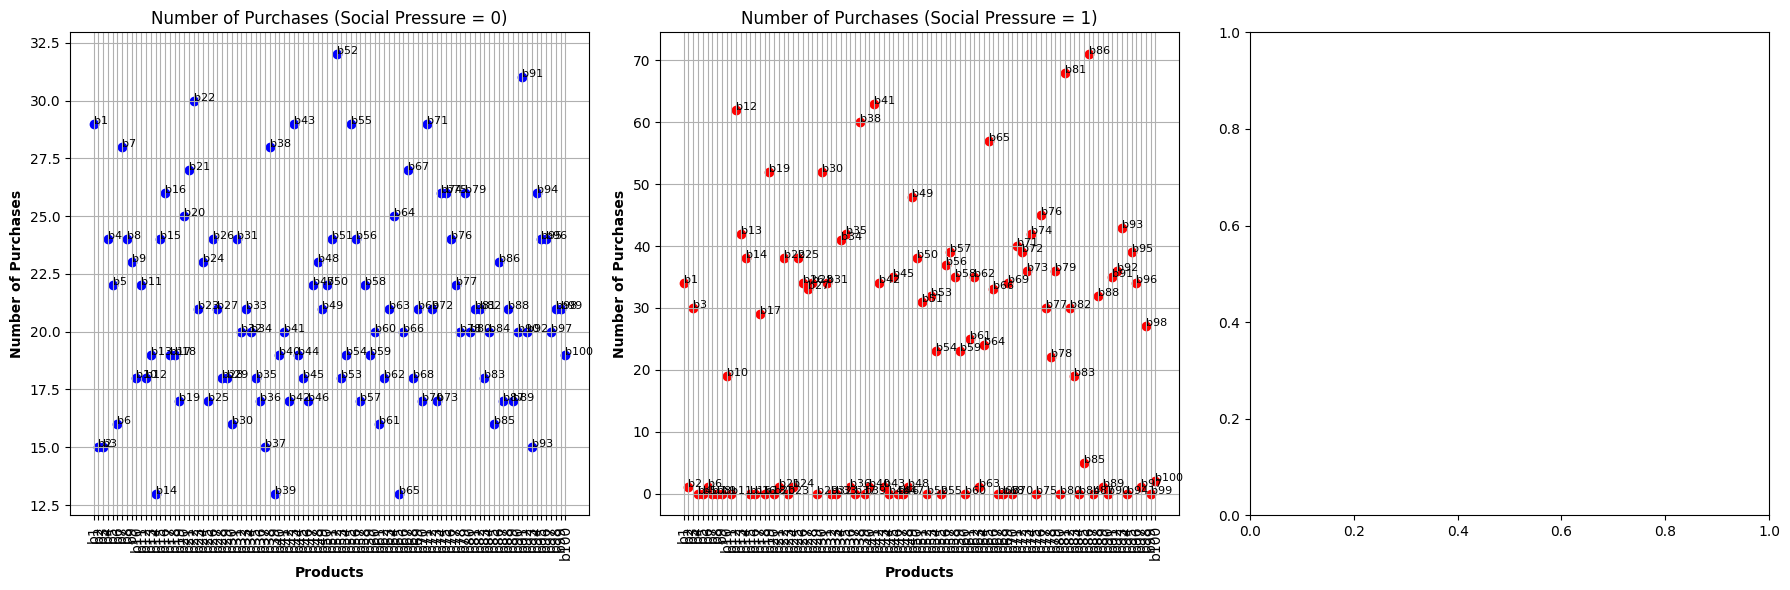

In [ ]:
# Ürünlerin toplam tercih sayıları
purchase_counts_1 = df_with_1.sum(axis=0)
purchase_counts_0 = df_with_0.sum(axis=0)
purchase_counts_05 = df_with_05.sum(axis=0)

# Grafik alanını ayarlama
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# İlk grafik: Social Pressure = 0
axes[0].scatter(purchase_counts_0.index, purchase_counts_0.values, color='blue')
for i, product in enumerate(purchase_counts_0.index):
    axes[0].text(purchase_counts_0.index[i], purchase_counts_0.values[i], product, fontsize=8)
axes[0].set_xlabel('Products', fontweight='bold')
axes[0].set_ylabel('Number of Purchases', fontweight='bold')
axes[0].set_title('Number of Purchases (Social Pressure = 0)')
axes[0].grid(True)
axes[0].tick_params(axis='x', rotation=90)



# Üçüncü grafik: Social Pressure = 1
axes[1].scatter(purchase_counts_1.index, purchase_counts_1.values, color='red')
for i, product in enumerate(purchase_counts_1.index):
    axes[1].text(purchase_counts_1.index[i], purchase_counts_1.values[i], product, fontsize=8)
axes[1].set_xlabel('Products', fontweight='bold')
axes[1].set_ylabel('Number of Purchases', fontweight='bold')
axes[1].set_title('Number of Purchases (Social Pressure = 1)')
axes[1].grid(True)
axes[1].tick_params(axis='x', rotation=90)

# Grafik düzenini ayarlama ve gösterme
plt.tight_layout()
plt.show()

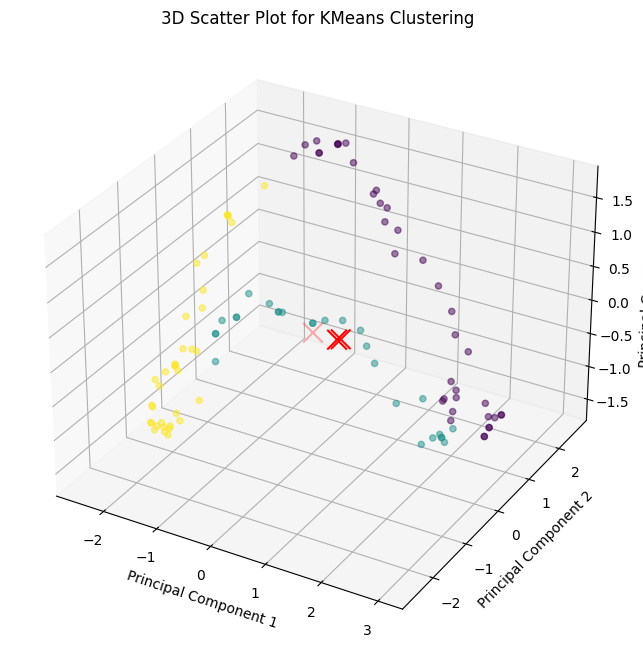

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Apply PCA to reduce dimensionality to 3 components
pca_3d = PCA(n_components=3)
df2_pca_3d = pca_3d.fit_transform(df2)

# Plot 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df2_pca_3d[:, 0], df2_pca_3d[:, 1], df2_pca_3d[:, 2], c=cluster_labels, cmap='viridis', marker='o', alpha=0.5)
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], c='red', marker='x', s=200)
ax.set_title('3D Scatter Plot for KMeans Clustering')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()


In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)

# Modeli veri üzerinde uygulama
knn.fit(df2, df2.index)

# Her kişi için tahmin yapma
predictions = knn.predict(df)

# Tahmin sonuçlarını gösterme
print("Kişi    Tahmin")
for person, prediction in zip(df.index, predictions):
    print(f"{person}        {prediction}")

ValueError: could not convert string to float: 't=0'